In [ ]:
import pandas as pan
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

In [ ]:
heartData=pan.read_csv('/content/hd.csv')
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print("Shape of Dataframe: ")
print(heartData.shape)
print("Datatypes of Features: ")
heartData.dtypes

Shape of Dataframe: 
(303, 14)
Datatypes of Features: 


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
print(heartData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


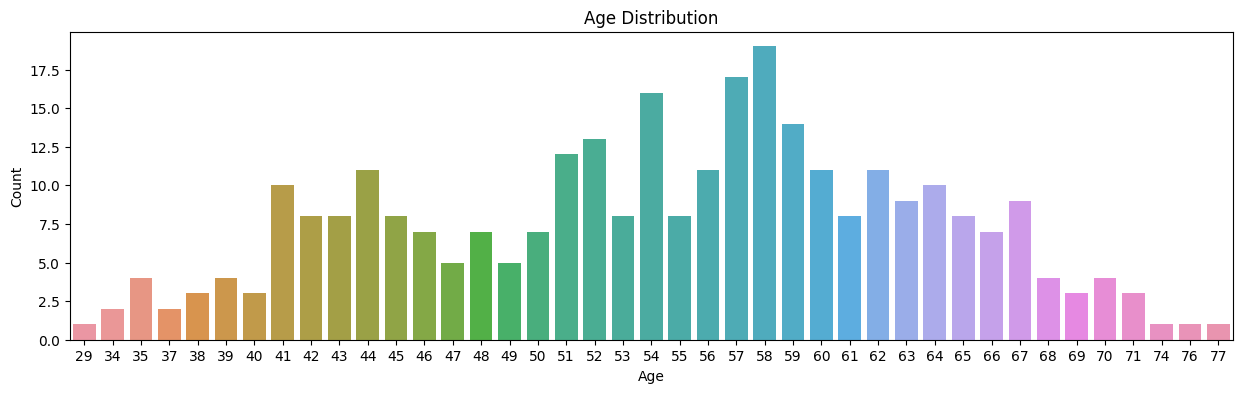

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=heartData['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

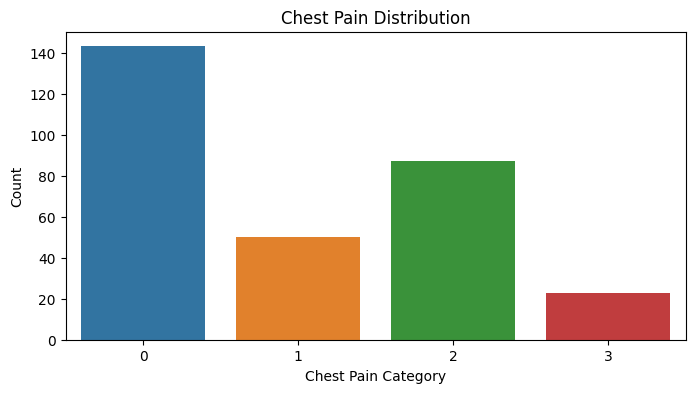

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=heartData['cp'])
plt.xlabel('Chest Pain Category')
plt.ylabel('Count')
plt.title('Chest Pain Distribution')
plt.show()

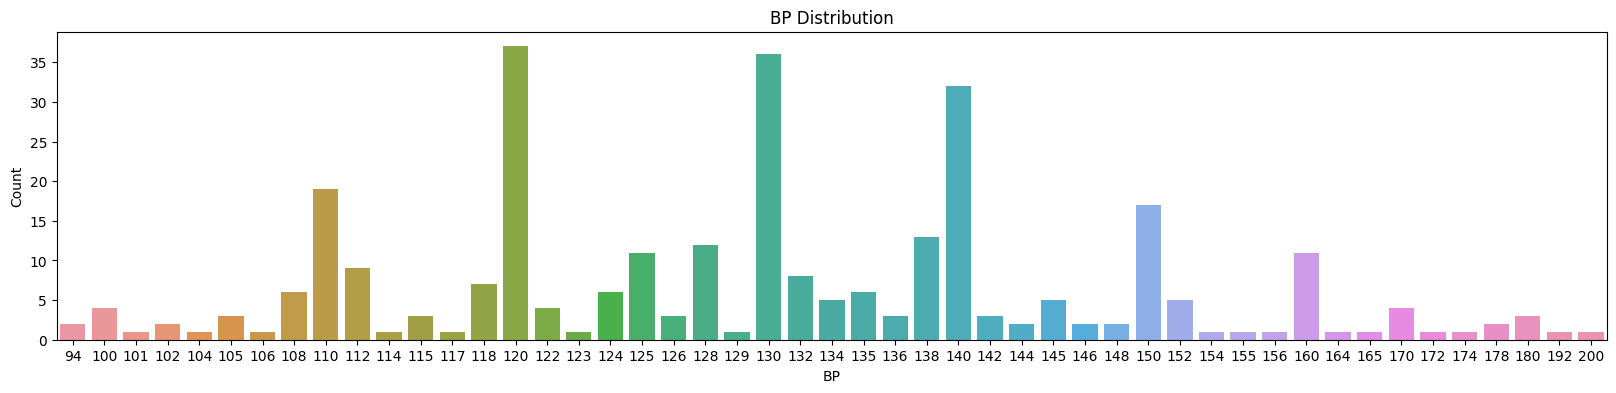

In [ ]:
plt.figure(figsize=(20,4))
sns.countplot(x=heartData['trestbps'])
plt.xlabel('BP')
plt.ylabel('Count')
plt.title('BP Distribution')
plt.show()

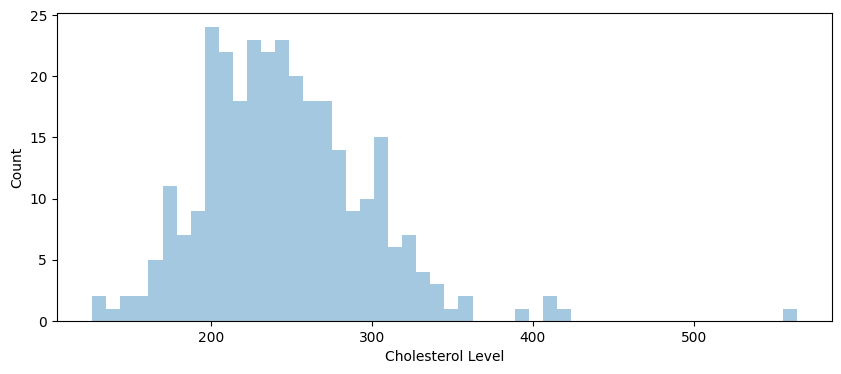

In [ ]:
plt.figure(figsize=(10,4))
sns.distplot(heartData['chol'], kde=False, bins=50)
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

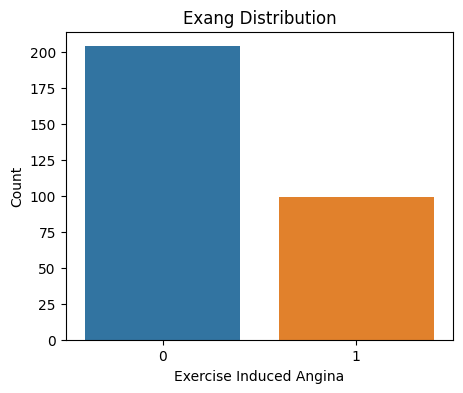

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=heartData['exang'])
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.title('Exang Distribution')
plt.show()

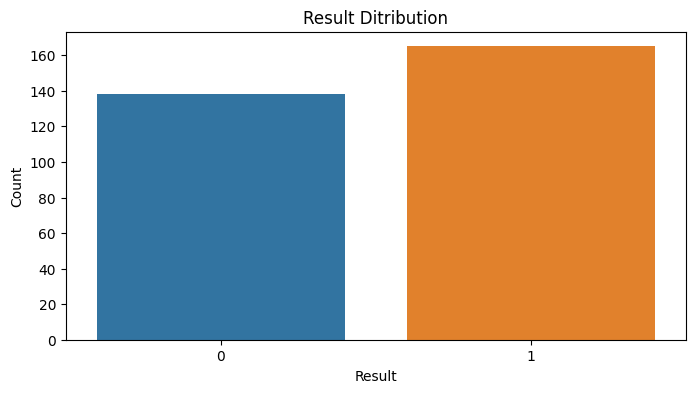

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=heartData['target'])
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Result Ditribution')
plt.show()

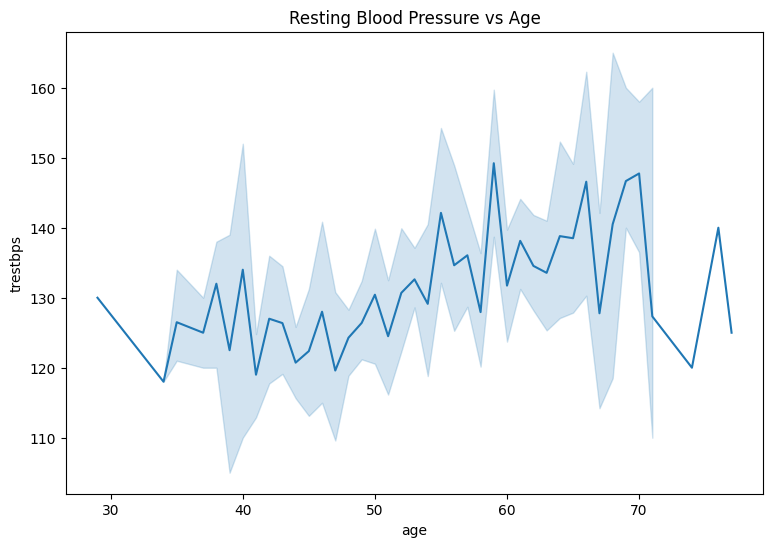

In [ ]:
# Age vs Blood Pressure at rest
plt.figure(figsize=(9,6))
sns.lineplot(x="age", y="trestbps", data=heartData)
plt.title("Resting Blood Pressure vs Age")
plt.show()

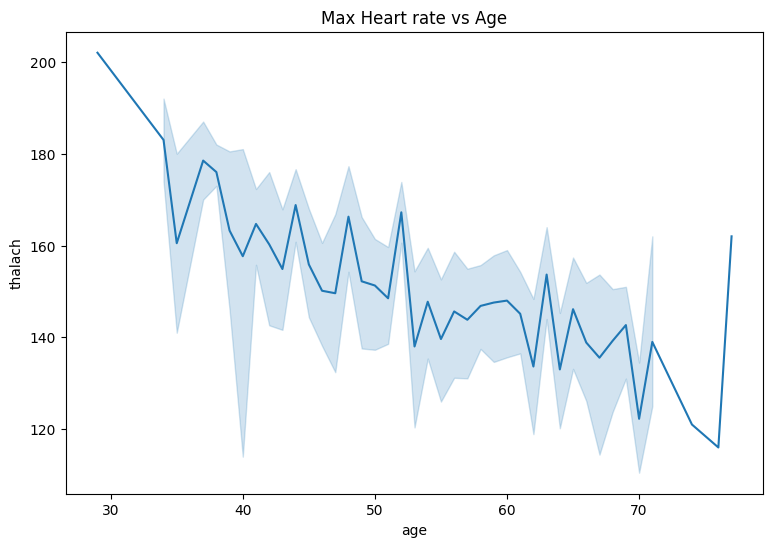

In [ ]:
# Age vs Max heart rate
plt.figure(figsize=(9,6))
sns.lineplot(x="age", y="thalach", data=heartData)
plt.title("Max Heart rate vs Age")
plt.show()

In [ ]:
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
X=heartData.drop(columns='target',axis=1)
Y=heartData['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=4)

In [ ]:
print(x_test.to_markdown())

|     |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   ca |   thal |
|----:|------:|------:|-----:|-----------:|-------:|------:|----------:|----------:|--------:|----------:|--------:|-----:|-------:|
| 292 |    58 |     0 |    0 |        170 |    225 |     1 |         0 |       146 |       1 |       2.8 |       1 |    2 |      1 |
|  38 |    65 |     0 |    2 |        155 |    269 |     0 |         1 |       148 |       0 |       0.8 |       2 |    0 |      2 |
|  26 |    59 |     1 |    2 |        150 |    212 |     1 |         1 |       157 |       0 |       1.6 |       2 |    0 |      2 |
| 286 |    59 |     1 |    3 |        134 |    204 |     0 |         1 |       162 |       0 |       0.8 |       2 |    2 |      2 |
| 267 |    49 |     1 |    2 |        118 |    149 |     0 |         0 |       126 |       0 |       0.8 |       2 |    3 |      2 |
| 217 |    63 |     1 |    0 |        130 |    330 |     1 |         

In [ ]:
print(y_test.to_markdown())

|     |   target |
|----:|---------:|
| 292 |        0 |
|  38 |        1 |
|  26 |        1 |
| 286 |        0 |
| 267 |        0 |
| 217 |        0 |
| 121 |        1 |
| 268 |        0 |
|  40 |        1 |
|   3 |        1 |
| 252 |        0 |
|  25 |        1 |
| 287 |        0 |
|   5 |        1 |
|  81 |        1 |
|  32 |        1 |
| 294 |        0 |
|  36 |        1 |
| 152 |        1 |
|  74 |        1 |
| 221 |        0 |
| 215 |        0 |
| 222 |        0 |
|  35 |        1 |
|   4 |        1 |
|   2 |        1 |
|  49 |        1 |
| 209 |        0 |
|  57 |        1 |
|  77 |        1 |
| 238 |        0 |
| 300 |        0 |
|  79 |        1 |
| 201 |        0 |
| 220 |        0 |
| 147 |        1 |
| 269 |        0 |
| 298 |        0 |
| 144 |        1 |
| 153 |        1 |
| 165 |        0 |
| 259 |        0 |
| 223 |        0 |
|  22 |        1 |
| 203 |        0 |
|  29 |        1 |
|  28 |        1 |
| 108 |        1 |
| 135 |        1 |
|  37 |        1 |
| 127 |     

In [ ]:
acc_array=[]
recall_array=[]
f_score=[]

USING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(x_train, y_train)
x_train_logic = logic.predict(x_train)
x_test_logic = logic.predict(x_test)

training_acc_logic = accuracy_score(x_train_logic, y_train)
testing_acc_logic = accuracy_score(x_test_logic, y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_logic*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_logic*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_logic)

precision_logic=precision_score(y_test,x_test_logic)
print("\nPrecision is %.2f"%(precision_logic*100))

acc_array.append(training_acc_logic*100)
print("\nConfusion Matrix: ")
cm_logic=confusion_matrix(y_test,x_test_logic)
print(cm_logic)
tp_l=cm_logic[1,1]
fp_l=cm_logic[0,1]
fn_l=cm_logic[1,0]
tn_l=cm_logic[0,0]

r_l=(tp_l/(tp_l+fn_l))
print("Recall: %.3f"%r_l)
recall_array.append(r_l)

f_l=(2*precision_logic*r_l)/(precision_logic+r_l)
print("F Score: %.3f"%f_l)
f_score.append(f_l)

Accuracy on Training Data: 82.64
Accuracy on Testing Data: 88.52

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0]

Precision is 84.21

Confusion Matrix: 
[[22  6]
 [ 1 32]]
Recall: 0.970
F Score: 0.901


USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier(random_state=3, max_features=0.1, min_samples_leaf=3, min_samples_split=8,n_estimators=750)
randomForest.fit(x_train,y_train)
x_train_rf=randomForest.predict(x_train)
x_test_rf=randomForest.predict(x_test)

training_acc_rf = accuracy_score(x_train_rf, y_train)
testing_acc_rf = accuracy_score(x_test_rf, y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_rf*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_rf*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_rf)

precision_rf=precision_score(y_test,x_test_rf)
print("\nPrecision is %.2f"%(precision_rf*100))

acc_array.append(training_acc_rf*100)

print("\nConfusion Matrix: ")
cm_rf=confusion_matrix(y_test,x_test_rf)
print(cm_rf)
tp_rf=cm_logic[1,1]
fp_rf=cm_logic[0,1]
fn_rf=cm_logic[1,0]
tn_rf=cm_logic[0,0]

r_rf=(tp_rf/(tp_rf+fn_rf))
print("Recall: %.3f"%r_rf)
recall_array.append(r_rf)

f_rf=(2*precision_rf*r_rf)/(precision_rf+r_rf)
print("F Score: %.3f"%f_rf)
f_score.append(f_rf)

Accuracy on Training Data: 92.56
Accuracy on Testing Data: 88.52

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0]

Precision is 84.21

Confusion Matrix: 
[[22  6]
 [ 1 32]]
Recall: 0.970
F Score: 0.901


USING KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_nearest=KNeighborsClassifier()
k_nearest.fit(x_train, y_train)
x_train_knn=k_nearest.predict(x_train)
x_test_knn=k_nearest.predict(x_test)

training_acc_knn=accuracy_score(x_train_knn,y_train)
testing_acc_knn=accuracy_score(x_test_knn,y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_knn*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_knn*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_knn)

precision_knn=precision_score(y_test,x_test_rf)
print("\nPrecision is %.2f"%(precision_knn*100))

acc_array.append(training_acc_knn*100)

print("\nConfusion Matrix: ")
cm_knn=confusion_matrix(y_test,x_test_knn)
print(cm_knn)
tp_knn=cm_knn[1,1]
fp_knn=cm_knn[0,1]
fn_knn=cm_knn[1,0]
tn_knn=cm_knn[0,0]

r_k=(tp_knn/(tp_knn+fn_knn))
print("Recall: %.3f"%r_k)
recall_array.append(r_k)

f_k=(2*precision_knn*r_k)/(precision_knn+r_k)
print("F Score: %.3f"%f_k)
f_score.append(f_k)

Accuracy on Training Data: 78.10
Accuracy on Testing Data: 63.93

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]

Precision is 84.21

Confusion Matrix: 
[[19  9]
 [13 20]]
Recall: 0.606
F Score: 0.705


USING SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC
support_vector=SVC()
support_vector.fit(x_train, y_train)
x_train_svm=support_vector.predict(x_train)
x_test_svm=support_vector.predict(x_test)

training_acc_svm=accuracy_score(x_train_svm,y_train)
testing_acc_svm=accuracy_score(x_test_svm,y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_svm*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_svm*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_svm)

precision_svm=precision_score(y_test,x_test_svm)
print("\nPrecision is %.2f"%(precision_svm*100))

acc_array.append(training_acc_svm*100)

print("\nConfusion Matrix: ")
cm_svm=confusion_matrix(y_test,x_test_svm)
print(cm_svm)
tp_svm=cm_svm[1,1]
fp_svm=cm_svm[0,1]
fn_svm=cm_svm[1,0]
tn_svm=cm_svm[0,0]

r_s=(tp_l/(tp_l+fn_l))
print("Recall: %.3f"%r_s)
recall_array.append(r_s)

f_s=(2*precision_svm*r_s)/(precision_svm+r_s)
print("F Score: %.3f"%f_s)
f_score.append(f_s)

Accuracy on Training Data: 66.12
Accuracy on Testing Data: 70.49

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]

Precision is 66.67

Confusion Matrix: 
[[13 15]
 [ 3 30]]
Recall: 0.970
F Score: 0.790


PERFORMANCE COMPARISON


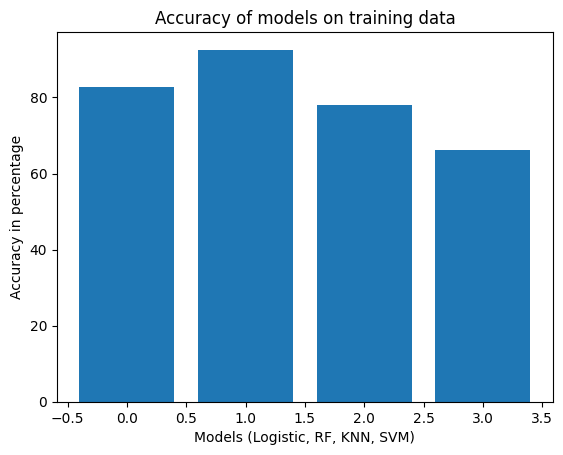

In [ ]:
x = range(len(acc_array))
plt.bar(x, acc_array)
plt.xlabel('Models (Logistic, RF, KNN, SVM)')
plt.ylabel('Accuracy in percentage')
plt.title('Accuracy of models on training data')
plt.show()

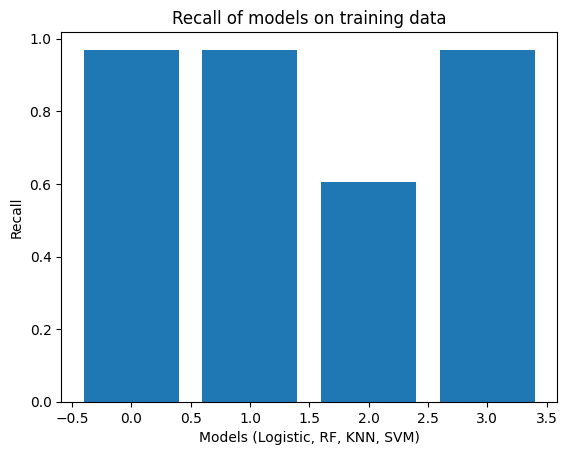

In [ ]:
y = range(len(recall_array))
plt.bar(y, recall_array)
plt.xlabel('Models (Logistic, RF, KNN, SVM)')
plt.ylabel('Recall')
plt.title('Recall of models on training data')
plt.show()

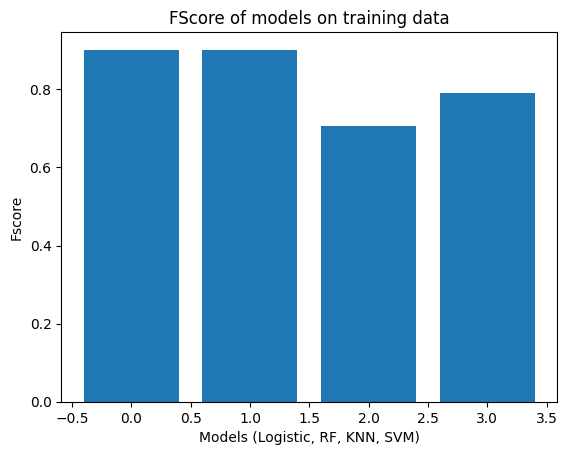

In [ ]:
z = range(len(f_score))
plt.bar(z, f_score)
plt.xlabel('Models (Logistic, RF, KNN, SVM)')
plt.ylabel('Fscore')
plt.title('FScore of models on training data')
plt.show()

In [ ]:
input_data=input("Enter the reading values : ")
inTuple=tuple(map(float, input_data.split(',')))
input_data_as_numpy_array = np.asarray(inTuple)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = randomForest.predict(input_data_reshape)

print("\n----------------------------------------------------------")
print("For the given readings: %s"%input_data)
print("----------------------------------------------------------")
print("==========================================================")
if(prediction[0]==0):
  print("The Patient has a HEALTHY HEART.")
else:
  print("The Patient's heart is PRONE TO A DISEASE!!!")
print("==========================================================")

Enter the reading values : 74,0,1,120,269,0,0,121,1,0.2,2,1,2

----------------------------------------------------------
For the given readings: 74,0,1,120,269,0,0,121,1,0.2,2,1,2
----------------------------------------------------------
The Patient's heart is PRONE TO A DISEASE!!!
